# Save Individual Expression Profile Plots

# 📦 Imports and setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


os.chdir('../../')
os.getcwd()

'd:\\Work\\Non PT\\Data Science\\BG\\mcrc-cetuximab-analysis'

In [6]:
os.makedirs("figures/profiles", exist_ok=True)

# 📥 Load expression and annotation data

In [16]:
# Load files
expression_df = pd.read_csv("data/log2_tpms_from_fpkm_hgnc_no_metastases_maxim.csv", index_col='sample_id')

expression_df_numeric = expression_df.select_dtypes(include=[float, int])

# 🖼️ Plot and save expression profiles (sample-wise)

In [17]:
# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 150

# Create individual distribution plots for each sample
for sample_id in expression_df_numeric.index:
    plt.figure(figsize=(8, 5))
    
    # Get expression values for this sample
    sample_data = expression_df_numeric.loc[sample_id]
    
    # Create plot
    ax = sns.histplot(sample_data, kde=True, bins=50, color='skyblue')
    
    # Customize plot
    ax.set_title(f'Gene Expression Distribution\n{sample_id}', pad=20)
    ax.set_xlabel('log2(TPM + 1)')
    ax.set_ylabel('Frequency')
    
    # Save with sample_id as filename
    filename = f"{sample_id}_expression_profile.png".replace(" ", "_")
    plt.savefig(os.path.join("figures/profiles", filename), bbox_inches='tight')
    plt.close()
    
    print(f"Created: {filename}")

print(f"\nSuccessfully created {len(expression_df_numeric)} expression profile plots in figures/profiles")

Created: 18R176_0020_expression_profile.png
Created: 18R177_0021_expression_profile.png
Created: 18R178_0022_expression_profile.png
Created: 18R296_0008_expression_profile.png
Created: 18R301_0002_expression_profile.png
Created: 18R421_0001_expression_profile.png
Created: 18R426_0006_expression_profile.png
Created: 18R427_0007_expression_profile.png
Created: 18R428_0008_expression_profile.png
Created: 18R429_0009_expression_profile.png
Created: 18R432_0012_expression_profile.png
Created: 18R433_0013_expression_profile.png
Created: 18R434_0014_expression_profile.png
Created: 18R435_0015_expression_profile.png
Created: 18R436_0016_expression_profile.png
Created: 18R437_0018_expression_profile.png
Created: 18R438_0019_expression_profile.png
Created: 18R440_0020_expression_profile.png
Created: 18R443_0022_expression_profile.png
Created: 18R449_0023_expression_profile.png
Created: 18R454_0027_expression_profile.png
Created: 18R456_0002_expression_profile.png
Created: 18R457_0023_expression_

In [18]:
# Check max value in this sample
print(f"Max value: {expression_df_numeric.loc['18R294_0001'].max()}")
# Verify log-transformation
print(f"Pre-log distribution:\n{expression_df_numeric.loc['18R294_0001'].describe()}")

Max value: 77.0
Pre-log distribution:
count    19389.000000
mean         3.449747
std          2.471639
min          0.000000
25%          1.317693
50%          3.381662
75%          5.260116
max         77.000000
Name: 18R294_0001, dtype: float64


(0.0, 100.0)

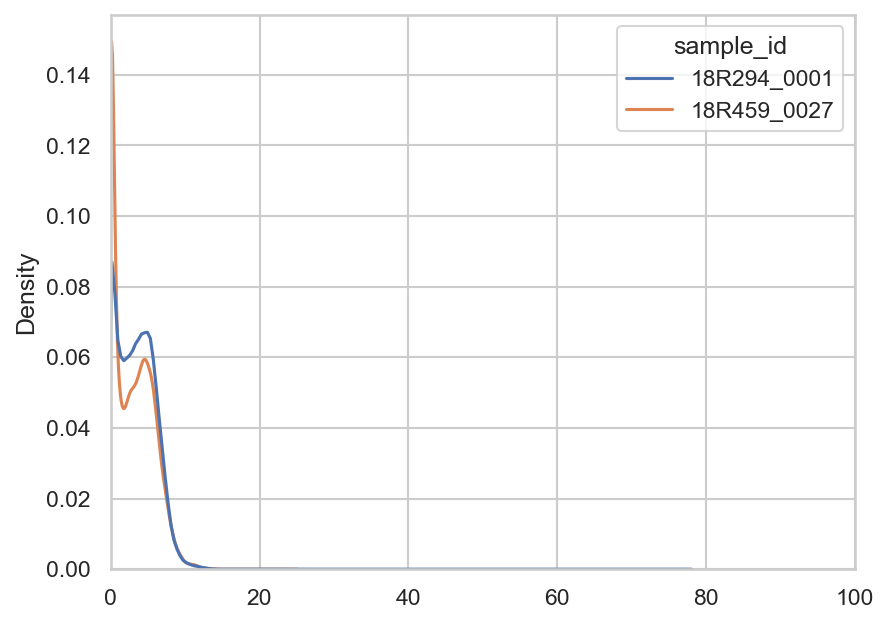

In [19]:
sns.kdeplot(data=expression_df_numeric.loc[['18R294_0001', '18R459_0027']].T)
plt.xlim(0, 100)